In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns

from pathlib import Path

In [2]:
data_folder = Path("../test_results")

## Index logs

In [3]:
index_logs_path = lambda db: Path(data_folder, f"index_logs_{db}_10000000_100.pickle")

In [4]:
def load_data(path):
    with open(path, 'rb') as datafile:
        data = pickle.load(datafile)
    return data

In [5]:
es_index_logs = pd.DataFrame(load_data(index_logs_path("elasticsearch"))["performance_results"])
batch_size = es_index_logs["data_size"][0]
es_index_logs["cumulative_size"] = np.cumsum(es_index_logs["data_size"])
es_index_logs["cumulative_time"] = np.cumsum(es_index_logs["time_spent"])

In [6]:
es_index_logs.head()

,data_size,time_spent,cumulative_size,cumulative_time
0,10000,11.915910,10000,11.915910
1,10000,8.363455,20000,20.279366
2,10000,8.362814,30000,28.642180
3,10000,8.340496,40000,36.982676
4,10000,9.366858,50000,46.349533


In [7]:
sns.set_theme()

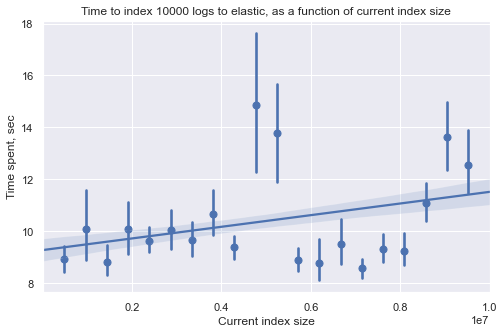

In [8]:
plt.figure(figsize=(8, 5))
plt.title(f"Time to index {batch_size} logs to elastic, as a function of current index size")
sns.regplot(x="cumulative_size", y="time_spent", data=es_index_logs, x_bins=20)
plt.xlabel("Current index size")
plt.ylabel("Time spent, sec")
plt.show()

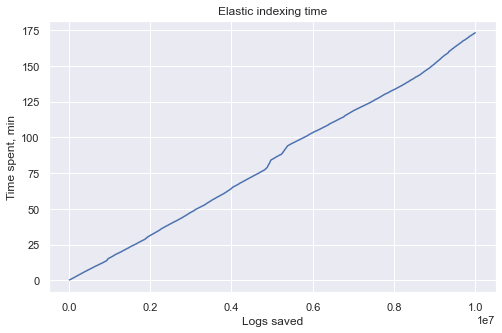

In [9]:
plt.figure(figsize=(8, 5))
plt.title("Elastic indexing time")
sns.lineplot(x="cumulative_size",
             y=es_index_logs["cumulative_time"]/60, 
             data=es_index_logs)
plt.xlabel("Logs saved")
plt.ylabel("Time spent, min")
plt.show()